# Importando bibliotecas

In [1651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Carregando dados

In [1652]:
pd.set_option('display.max_columns', None)

In [1653]:
dados_original = pd.read_excel('Leontis.xlsx')
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


# Tratando dataframe

In [1654]:
dados_original.loc[dados_original['Em qual faixa etária você se encaixa?'] == 'Entre 19 e 24 anos', 'Em qual faixa etária você se encaixa?'] = 'Entre 18 e 24 anos'

dados_original.loc[dados_original['Em qual faixa etária você se encaixa?'] == 'Entre 46 a 59 anos', 'Em qual faixa etária você se encaixa?'] = 'Entre 46 e 59 anos'

dados_original.loc[dados_original['Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.'] == 'Sem um guia/planejamento para ver as obras', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.'] = 'Sem um guia/planejamento para ver as obras.'

In [1655]:
dados = dados_original.copy()

## Escolhendo colunas

In [1656]:
dados.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [1657]:
dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)
dados.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


# Analisando dados únicos

In [1658]:
for i in dados:
    print(i)
    print(dados[i].unique())
    print()
    print("=" * 30)

Em qual faixa etária você se encaixa?
['Menos de 18 anos' 'Entre 25 e 35 anos' 'Entre 46 e 59 anos'
 'Entre 36 e 45 anos' 'Entre 18 e 24 anos' '60+ anos']

Com qual gênero você se identifica?
['Masculino' 'Feminino' 'Outro']

Qual seu nível de formação atual?
['Cursando ensino médio' 'Ensino superior concluído'
 'Cursando ensino superior' 'Cursando ensino fundamental'
 'Ensino fundamental incompleto' 'Ensino superior incompleto/não iniciado'
 'Ensino médio incompleto']

Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
['Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil'
 'Classe B: entre R$ 7,1 mil e R$ 22 mil' 'Classe A: superior a R$ 22 mil']

Há quanto tempo você se interessa por arte?
['Menos de 2 anos' 'Não me interesso' 'De 2 a 4 anos'
 'Estou iniciando agora' 'Há mais de 10 anos' 'De 5 a 9 anos']

Qual das opções de arte abaixo você mais gosta?
['Fotografia' 

# Modelo não supervisionado cru

In [1659]:
df = dados.copy()

## Transformando em numérico

In [1660]:
df.fillna("#", inplace=True)
df.loc[df['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df:
    print(i)
    if df[i].dtype == object:
        dados_unique = df[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

    df[i] = df[i].map(mapeamento)

Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Há quanto tempo você se interessa por arte?
Qual das opções de arte abaixo você mais gosta?
Com que frequência você vai aos museus?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?


## Aplicando modelo

In [1661]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 5, random_state=0, n_init="auto")

modelo.fit(df)

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[3 0 2 2 4 0 0 2 4 2 2 3 4 2 3 0 2 2 0 2 0 4 0 0 3 0 0 2 0 3 3 3 0 2 2 0 2
 3 2 0 2 2 2 3 3 0 0 4 1 0 0 3 2 2 0 3 2 2 0 3 4 0 1 0 2 2 1 2 1 2 2 0 2 4
 3 4 2 1 0 0 1 0 0 0 3 2 0 2 2 2 2 3 1 2 2 2 0 1 1 2 3 0 2 4 2 4 1 2 3 0 2
 0 2 1 1 0 3 0 0 2 2 1 0 4 2 2 0 3 2 2 2 0 2 2 1 4 0 0 2 3 1 3 3 0 0 0 4 0
 2 3 2 1 0 3 3 0 3 3 0 4 0 0 3 0 1 2 3 0 3 3 2 3 2 2 0 4 4 1 1 4 1 1 1 1 3
 4 0 1 3 0 0 4 4 0 1 1 1 4 0 1 2 0 4 1 1 1 4 4 1 1 0 1 4 4 4 0 1 0 4 4 3 2
 0 4 1 4 4 1 1 0 1 4 1 4 1 1 1 1 4 1 0 0 1 4 4 3 4 2]


In [1662]:
dados['Cluster'] = labels

In [1663]:
centers

array([[ 3.74242424e+00,  4.39393939e-01,  2.18181818e+00,
         1.51515152e+00, -1.77635684e-15, -2.22044605e-15,
        -3.10862447e-15,  8.88178420e-16, -6.66133815e-16,
        -1.33226763e-15, -1.55431223e-15, -1.33226763e-15,
         1.55431223e-15,  0.00000000e+00, -6.66133815e-16,
         4.44089210e-16],
       [ 2.19565217e+00,  3.69565217e-01,  4.78260870e+00,
         1.32608696e+00,  3.47826087e+00,  4.58695652e+00,
         3.86956522e+00,  1.52173913e+00,  1.82608696e+00,
         2.56521739e+00,  1.21739130e+00,  2.91304348e+00,
         2.00000000e+00,  2.00000000e+00,  4.30434783e+00,
         1.91304348e+00],
       [ 4.73770492e+00,  4.09836066e-01,  6.55737705e-01,
         1.65573770e+00,  2.49180328e+00,  4.49180328e+00,
         3.90163934e+00,  1.52459016e+00,  1.81967213e+00,
         2.72131148e+00,  1.18032787e+00,  3.42622951e+00,
         1.42622951e+00,  5.40983607e-01,  6.55737705e-02,
         4.91803279e-02],
       [ 4.86486486e+00,  4.86486486e

## Visualizando as características de cada cluster

In [1664]:
cluster_0 = dados.loc[dados['Cluster'] == 0]
cluster_1 = dados.loc[dados['Cluster'] == 1]
cluster_2 = dados.loc[dados['Cluster'] == 2]
cluster_3 = dados.loc[dados['Cluster'] == 3]
cluster_4 = dados.loc[dados['Cluster'] == 4]

### Analisando Cluster 0

In [1665]:
cluster_0.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,Entre 36 e 45 anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,Menos de 18 anos,Feminino,Cursando ensino fundamental,Classe A: superior a R$ 22 mil,Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [1666]:
for i in cluster_0:
    print(cluster_0[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      36
Entre 18 e 24 anos     8
Entre 25 e 35 anos     7
Entre 36 e 45 anos     7
Entre 46 e 59 anos     6
60+ anos               2
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     37
Masculino    29
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental                22
Ensino superior concluído                  18
Cursando ensino médio                      14
Cursando ensino superior                    8
Ensino superior incompleto/não iniciado     4
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    28
Classe B: entre R$ 7,1 mil e R$ 22 mil     23
Classe A: superior a R$ 22 mil              8
Classes D/E: até R$ 2,9 mil                 7
Name: count, dtype: int64
Há quanto tempo você se interessa por art

#### Cluster 0

ANOTAÇÕES
- Cluster só com pessoas que não possuem interesse por arte, exceto um, que já fica satisfeito com as informações disponibilizadas nos museus
- <font color='yellow'>Não utilizariam o nosso aplicativo por não se interessarem por arte ou não sentir falta de informações</font>

### Analisando Cluster 1

In [1667]:
cluster_1.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
48,60+ anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Frequentemente (máximo cinco vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
62,Entre 36 e 45 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Fotografia,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
66,Entre 46 e 59 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Com um guia do próprio museu.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
68,60+ anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Sim,Com um guia do próprio museu.,Sim,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
77,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classes D/E: até R$ 2,9 mil",Estou iniciando agora,Fotografia,Raramente (uma vez ao ano),Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Redes sociais,Sim,1


In [1668]:
for i in cluster_1:
    print(cluster_1[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    20
Entre 46 e 59 anos     9
Entre 36 e 45 anos     7
60+ anos               6
Entre 18 e 24 anos     4
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     29
Masculino    17
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  37
Ensino superior incompleto/não iniciado     4
Cursando ensino superior                    3
Cursando ensino médio                       1
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    19
Classe B: entre R$ 7,1 mil e R$ 22 mil     17
Classe A: superior a R$ 22 mil              8
Classes D/E: até R$ 2,9 mil                 2
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos    

#### Cluster 1

ANOTAÇÕES
- Grande predominância de menores de 18 anos
- Predominância feminina neste cluster
- Renda per capita da casa é uma classe média alta
- Maior interesse por arte há mais de 10 anos
- Frequencia em museus baixa
- Todos sentem falta de informações nos museus
- Todos procuram saber mais sobre
- Quase metade não encontra as infromações faltantes
- <font color='yellow'>Possíveis utilizadores do app, já que sentem falta de informações e procuram saber sobre; se interessam mais por pinturas e fotografias. Porém a maioria das vezes encontram o que precisavam/esperavam e não costumam ir muito para o museu</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando ensino fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

### Analisano Cluster 2

In [1669]:
cluster_2.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
7,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
9,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Escultura,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
10,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2


In [1670]:
for i in cluster_2:
    print(cluster_2[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      57
Entre 18 e 24 anos     4
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     38
Masculino    21
Outro         2
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio          40
Cursando ensino fundamental    21
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    31
Classe B: entre R$ 7,1 mil e R$ 22 mil     18
Classes D/E: até R$ 2,9 mil                 7
Classe A: superior a R$ 22 mil              5
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
De 5 a 9 anos            19
De 2 a 4 anos            16
Estou iniciando agora    11
Há mais de 10 anos       10
Menos de 2 anos           5
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura                    24

#### Cluster 2

ANOTAÇÕES
- Faixa etária jovem, predominantemente menor de idade (Menos de 18 anos)*
- Nível de formação balanceado entre fundamental e ensino médio *(cursando fundamental e cursando ensino médio)*
- Renda per capita média por volta de R$12.000 *(Classe C)*
- Interesse por arte mais ou menos balançeado *(De 5 a 9 anos)*
- Pintura e Fotografia lideram *(Pintura e Fotografia)*
- Frequência em museus baixa
- Participação em atividade de arte balançeado entre sim e não *(Sim e Não)*
- Mais de 80% das pessoas seguem artistas nesse cluster *(Sim)*
- Maioria não utiliza um guia *(Sem um guia/planejamento.)*
- Mais de 80% nunca utilizou um aplicativo de um museu ou relacionado a arte *(Não)*
- Maioria vai por lazer *(lazer)*
- Balanceado entre sentir falta de informações e não sentir, mas ainda com a maioria sentindo falta *(Sim e Não)*
- Grande maioria não procura informações faltantes *(Não)*
- Procura em blogs favoritos e aplicativos *(Blogs Favoritos e Aplicativos)*
- Todos não encontram o que precisavam *(Não)*
- <font color='yellow'>Não usariam nosso aplicativo. Uma vez que a maioria não sente falta de informações e os que sentem falta, apenas 9% procuram saber sobre e possuem baixa frequência em museus</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font> e <font color='yellow'>*masculino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 5 a 9 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font> e <font color='yellow'>*Fotografia*</font>
- Com que frequência você vai aos museus? Disperso entre <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Não*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Aplicativos*</font> e <font color='yellow'>*Blogs favoritos*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Não*</font>

### Analisando Cluster 3

In [1671]:
cluster_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,3
11,Menos de 18 anos,Masculino,Cursando ensino fundamental,"Classes D/E: até R$ 2,9 mil",De 2 a 4 anos,Arte digital,Nunca,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,3
14,Menos de 18 anos,Feminino,Cursando ensino fundamental,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,3
24,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em inteligências artificiais (ChatGPT, G...",Sim,3
29,Menos de 18 anos,Feminino,Ensino fundamental incompleto,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Sim,Sim,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,3


In [1672]:
for i in cluster_3:
    print(cluster_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      35
Entre 18 e 24 anos     1
Entre 46 e 59 anos     1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     23
Masculino    10
Outro         4
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental      17
Cursando ensino médio            16
Ensino fundamental incompleto     3
Cursando ensino superior          1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    15
Classe B: entre R$ 7,1 mil e R$ 22 mil     13
Classes D/E: até R$ 2,9 mil                 9
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       13
De 2 a 4 anos             7
Menos de 2 anos           6
Estou iniciando agora     6
De 5 a 9 anos             5
Name: count, dtype: int64
Qual das opções de art

#### Cluster 3

ANOTAÇÕES
- Baixa frequência em museus
- Vão por lazer, aprendizado ou inspiração
- 78% sentem falta de informações
- 72% dos que sentem falta de informações, procuram saber mais sobre
- Costumam procurar em navegadores
- Maioria encontra o que queria
- <font color='yellow'>Possiveis utilizadores do aplicativo, sentem falta de informação nos museus e procuram sobre, gostam de pintura e vão também por aprendizado e inspiração. Apesar de terem uma baixa frequência em museus e a maioria encontrar o que precisava </font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Entre 25 e 35 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Ensino superior concluído*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe B*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font> e <font color='yellow'>*Fotografia*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Ocasionalmente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Não*</font> e <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Aprendizado*</font> e <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

### Analisando Cluster 4

In [1673]:
cluster_4.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4
8,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 2 a 4 anos,Fotografia,Raramente (uma vez ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4
12,Entre 46 e 59 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4
21,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,4
47,Entre 18 e 24 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 5 a 9 anos,Escultura,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4


In [1674]:
for i in cluster_4:
    print(cluster_4[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 46 e 59 anos    11
Entre 25 e 35 anos     8
Entre 36 e 45 anos     7
Entre 18 e 24 anos     6
60+ anos               6
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     29
Masculino     9
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  30
Ensino superior incompleto/não iniciado     5
Cursando ensino superior                    2
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe B: entre R$ 7,1 mil e R$ 22 mil     16
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    11
Classe A: superior a R$ 22 mil              7
Classes D/E: até R$ 2,9 mil                 4
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       21
Menos de 2 anos           5
De 5 a 9 ano

#### Cluster 4

ANOTAÇÕES
- <font color='yellow'>Muito provável de não usarem nosso aplicativo, sendo um cluster formado apenas de pessoas desinteressadas em arte</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>, <font color='yellow'>*Entre 25 e 35 anos*</font>, <font color='yellow'>*Entre 36 e 45 anos*</font> e <font color='yellow'>*Entre 46 e 59 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Ensino superior concluído *</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*Não me interesso*</font>

## Conclusão

Ao analisar cada cluster, concluí que o modelo crú não satisfaz nosso objetivo, sendo necessário fazer uma melhor separação das pessoas que possuem características mais atraentes para o aplicativo.

# Modelo não supervisionado com colunas relevantes e pesos

## Escolhendo e tratando colunas

In [1675]:
df_2 = dados.copy()
df_2.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,3
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4


In [1676]:
colunas_2 = ['Qual das opções de arte abaixo você mais gosta?', 'Com que frequência você vai aos museus?', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.', 'O que mais te atrai em visitar museus ou exposições de arte?', 'Você sente falta de mais informações sobre as obras nos museus?', 'Você procura saber sobre essas informações faltantes?', 'Você encontra o que precisa/esperava ao pesquisar?']
df_2  = df_2[colunas_2]
df_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN


In [1677]:
for i in df_2:
    print(df_2[i].unique())

['Fotografia' nan 'Escultura' 'Pintura' 'Arte de rua/grafite'
 'Arte digital' 'Arquitetura e Urbanismo']
['Raramente (uma vez ao ano)' nan
 'Ocasionalmente (máximo três vezes ao ano)'
 'Muito frequentemente (mais de cinco vezes ao ano)' 'Nunca'
 'Frequentemente (máximo cinco vezes ao ano)']
['Sem um guia/planejamento para ver as obras.' nan
 'Planejo minha rota antes.'
 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).'
 'Com um guia do próprio museu.']
['Lazer' nan 'Aprendizado' 'Inspiração' 'Não visito'
 'Apenas acompanho alguém']
['Sim, sinto falta de mais informações' nan
 'Não, acredito que o que tem no museu é o suficiente']
['Sim, procuro' nan 'Não, apenas me conformo']
['Não' nan 'Sim']


In [1678]:
x = df_2.copy()
x.fillna("#", inplace=True)

In [1679]:
x

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,#,#,#,#,#,#,#
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
...,...,...,...,...,...,...,...
243,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Não, acredito que o que tem no museu é o sufic...",#,#
244,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#
245,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não
246,Arte digital,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#


### Aplicando pesos para características mais relevantes

In [1680]:
mapeamento_tipo_arte = {'#': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 3,'Arte de rua/grafite': 2}
mapeamento_frequencia = {'#': 0, 'Frequentemente (máximo cinco vezes ao ano)': 20,'Muito frequentemente (mais de cinco vezes ao ano)': 20,'Ocasionalmente (máximo três vezes ao ano)': 17,'Raramente (uma vez ao ano)': 3,'Nunca': 1}
mapeamento_guia = {'#': 0, 'Planejo minha rota antes.': 45, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 40, 'Com um guia do próprio museu.': 40, 'Sem um guia/planejamento para ver as obras.': -3}
mapeamento_motivo = {'#': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'#': 0, 'Sim, sinto falta de mais informações': 18, 'Não, acredito que o que tem no museu é o suficiente': -1}
mapeamento_procurar_info = {'#': 0, 'Sim, procuro': 12, 'Não, apenas me conformo': 0}
mapeamento_achar_info = {'#': 0, 'Sim': 2, 'Não': 10}
mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_achar_info}

In [1681]:
x

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,#,#,#,#,#,#,#
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",#
...,...,...,...,...,...,...,...
243,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Não, acredito que o que tem no museu é o sufic...",#,#
244,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#
245,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não
246,Arte digital,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#


In [1682]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for i in x:
#     if x[i].dtypes == 'object':
#         x[i] = le.fit_transform(x[i])

# x

In [1683]:
for k, v in mapeamento_2.items():
    x[k] = x[k].map(v)

In [1684]:
x

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,8,3,-3,6,18,12,10
1,0,0,0,0,0,0,0
2,6,17,-3,10,-1,0,0
3,8,17,-3,6,18,0,0
4,8,20,45,9,18,0,0
...,...,...,...,...,...,...,...
243,8,17,-3,9,-1,0,0
244,8,3,-3,10,-1,0,0
245,8,3,-3,9,18,12,10
246,3,3,-3,6,18,0,0


### Normalizando

In [1685]:
from sklearn.preprocessing import StandardScaler

features = colunas_2
x_normalizado = x.loc[:, features].values
x_normalizado = StandardScaler().fit_transform(x_normalizado)

x_normalizado = pd.DataFrame(x_normalizado, columns=colunas_2)

## Verificando o melhor número de clusters

### Utilizando The Elbow Method

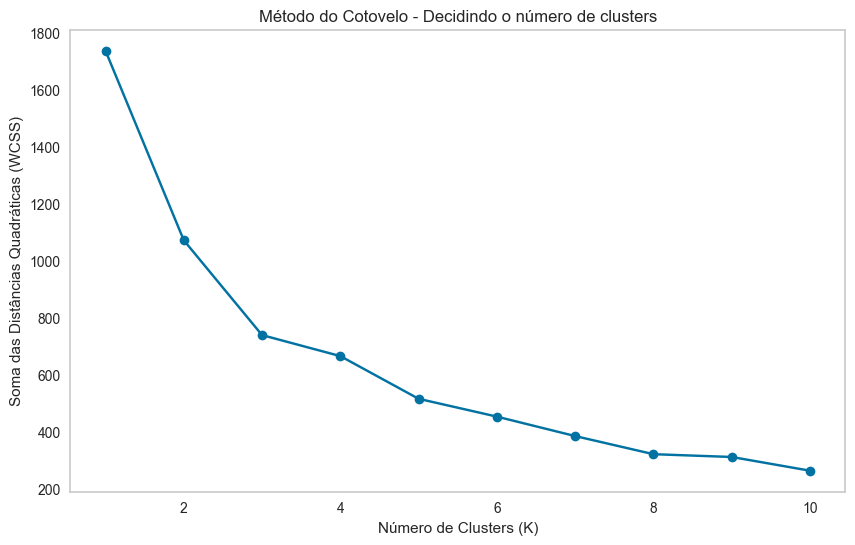

In [1686]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_normalizado)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo - Decidindo o número de clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das Distâncias Quadráticas (WCSS)')
plt.grid()
plt.show()

É possível notar uma maior quebra com 3 clusters

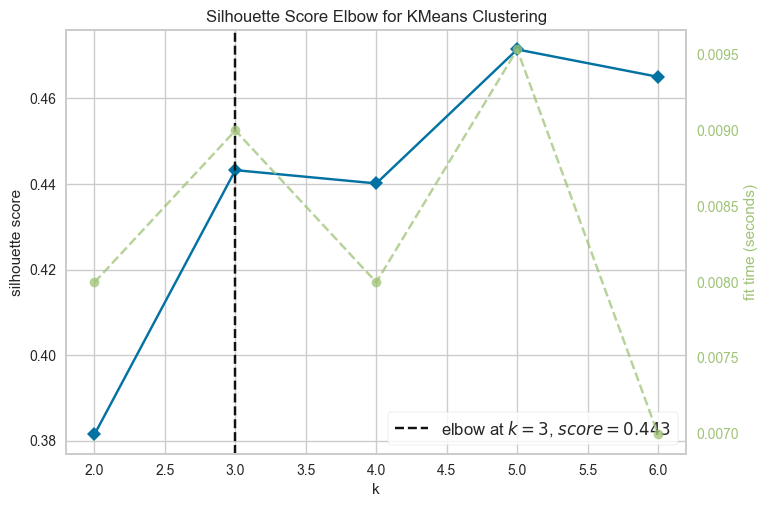

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [1687]:
model = KMeans(x_normalizado)
visualizer = KElbowVisualizer(model, k=6, metric="silhouette", distance_metric='euclidean')

visualizer.fit(x_normalizado)
visualizer.show()

Utilizando este código ele já indica o melhor k em consideração da quebra

## Aplicando modelo

In [1688]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3, random_state=0, n_init="auto", algorithm='elkan', max_iter=500)

modelo.fit(x_normalizado)

centers = modelo.cluster_centers_  

labels_2 = modelo.labels_

print(labels_2)

[1 0 2 2 2 0 0 2 2 2 2 1 2 2 1 0 0 2 0 1 0 2 0 0 1 0 0 2 0 1 1 1 0 2 2 0 2
 1 2 0 2 2 2 1 1 0 0 2 1 0 0 1 2 2 0 1 0 2 0 1 2 0 1 0 2 2 1 2 1 2 2 0 0 2
 1 2 2 1 0 0 1 0 0 0 1 2 0 2 2 2 2 1 1 2 2 2 0 1 1 2 1 0 2 2 2 2 1 2 1 0 2
 0 2 1 1 0 1 0 0 2 2 1 0 2 2 2 0 1 2 2 2 0 1 2 1 2 0 0 2 1 1 1 1 0 0 0 2 0
 2 1 1 1 0 1 1 0 1 1 0 2 0 0 1 0 1 2 1 0 1 1 2 1 2 2 0 2 2 1 1 2 1 1 1 1 1
 2 0 1 1 0 0 0 2 0 1 1 1 2 0 1 2 0 2 1 1 1 2 2 1 1 0 1 2 2 2 0 1 0 2 2 1 2
 0 2 1 2 2 1 1 0 1 2 1 2 1 1 1 1 2 1 0 0 1 2 2 1 2 2]


In [1689]:
df_2['Cluster'] = labels_2

In [1690]:
# def calculate_wcss(data):
#     wcss = []
#     for n in range(2, 21):
#         kmeans = KMeans(n_clusters=n)
#         kmeans.fit(X=data)
#         wcss.append(kmeans.inertia_)

#     return wcss

In [1691]:
# calculate_wcss(df_2[['PCA1', 'PCA2']])

## Visualizando características dos clusters

In [1692]:
cluster_0_2 = df_2.loc[df_2['Cluster'] == 0]
cluster_1_2 = df_2.loc[df_2['Cluster'] == 1]
cluster_2_2 = df_2.loc[df_2['Cluster'] == 2]
# cluster_3_2 = df_2.loc[df_2['Cluster'] == 3]
# cluster_4_2 = df_2.loc[df_2['Cluster'] == 4]
# cluster_5_2 = df_2.loc[df_2['Cluster'] == 5]


### Cluster 0

In [1693]:
cluster_0_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16,Arte digital,Nunca,Planejo minha rota antes.,Não visito,NaN,NaN,NaN,0


In [1694]:
for i in cluster_0_2:
    print(cluster_0_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Arte digital           3
Arte de rua/grafite    1
Name: count, dtype: int64
Com que frequência você vai aos museus?
Nunca                         2
Raramente (uma vez ao ano)    2
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.    3
Planejo minha rota antes.                      1
Name: count, dtype: int64
O que mais te atrai em visitar museus ou exposições de arte?
Não visito    2
Lazer         2
Name: count, dtype: int64
Você sente falta de mais informações sobre as obras nos museus?
Não, acredito que o que tem no museu é o suficiente    2
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Cluster
0    70
Name: count, dtype: int64


### Cluster 1

In [1695]:
cluster_1_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Fotografia,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não,1
11,Arte digital,Nunca,Sem um guia/planejamento para ver as obras.,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim,1
14,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não,1
19,Pintura,Raramente (uma vez ao ano),Sem um guia/planejamento para ver as obras.,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Não,1
24,Fotografia,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Sim,1


In [1696]:
for i in cluster_1_2:
    print(cluster_1_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    33
Fotografia                 26
Arte digital                9
Arquitetura e Urbanismo     9
Escultura                   6
Arte de rua/grafite         3
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           42
Ocasionalmente (máximo três vezes ao ano)            32
Nunca                                                 5
Frequentemente (máximo cinco vezes ao ano)            5
Muito frequentemente (mais de cinco vezes ao ano)     2
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         46
Planejo minha rota antes.                                                                           14
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Cluster 2

In [1697]:
cluster_2_2.head()

,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
2,Escultura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,2
3,Pintura,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,2
4,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Planejo minha rota antes.,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,2
7,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sem um guia/planejamento para ver as obras.,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,2
8,Fotografia,Raramente (uma vez ao ano),"Utilizo o planejamento de terceiros (sites, bl...",Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,2


In [1698]:
for i in cluster_2_2:
    print(cluster_2_2[i].value_counts())
    print('=' * 30)

Qual das opções de arte abaixo você mais gosta?
Pintura                    35
Fotografia                 25
Arquitetura e Urbanismo    12
Arte digital                9
Escultura                   6
Arte de rua/grafite         5
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                           45
Ocasionalmente (máximo três vezes ao ano)            24
Nunca                                                12
Frequentemente (máximo cinco vezes ao ano)            8
Muito frequentemente (mais de cinco vezes ao ano)     3
Name: count, dtype: int64
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Sem um guia/planejamento para ver as obras.                                                         51
Com um guia do próprio museu.                                                                       16
Utilizo o planejamento de terceiros (sites, blogs, páginas em redes

### Visualizando

In [1699]:
labels_2

array([1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2,
       1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 2, 2, 1, 2, 2])

In [1700]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_normalizado)

x_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
x_normalizado = pd.concat([x_normalizado, x_pca], axis=1)

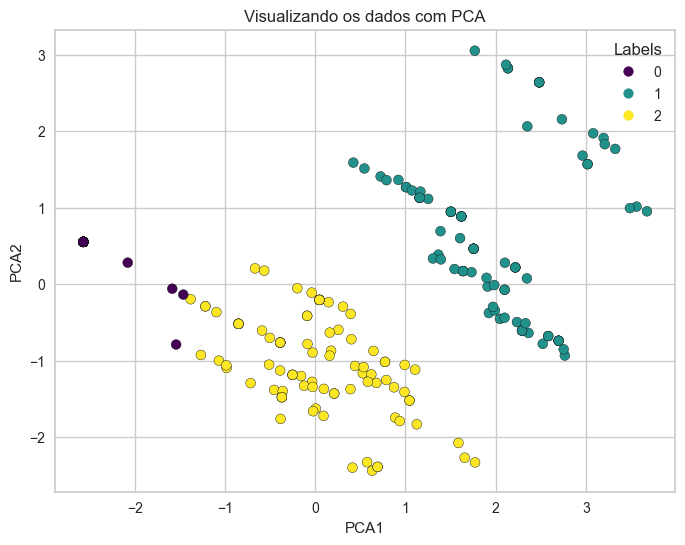

In [1701]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_normalizado['PCA1'], x_normalizado['PCA2'], c=labels_2, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

### Criando a label e colunas

In [1702]:
dados_2_c_label = dados_original.copy()
dados_2_c_label['Cluster'] = labels_2

In [1703]:
mapeamento_usa_app = {0: 'Não', 1: 'Sim', 2: 'Não'}
dados_2_c_label['Usaria o aplicativo?'] = dados_2_c_label['Cluster'].map(mapeamento_usa_app)
dados_2_c_label.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1,Sim
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Não
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2,Não
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2,Não
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2,Não


In [1720]:
dados_2_c_label['Usaria o aplicativo?'].value_counts()

Usaria o aplicativo?
Não    162
Sim     86
Name: count, dtype: int64

In [1705]:
# dados_original.to_excel('dados_possiveis_usuarios_c_label_2_clusters.xlsx', index=False)

## Conclusão

Depois de testes, observei que apesar da melhora após a aplicação de boas práticas para este modelo, ele ainda segue podendo ter uma maior performance e divisão. Porém seus resultados são consideravelmente satisfatórios.

# Modelo não supervisionado com PCA

## Preparando a base

- Copiando a base original
- Excluindo colunas desnecessárias
- Substituindo nulos

In [1706]:
dados_3 = dados_original.copy()
dados_3.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)

In [1707]:
df_3 = dados_3.copy()
df_3.fillna("#", inplace=True)
for k, v in mapeamento_2.items():
    df_3[k] = df_3[k].map(v)
display(df_3)
df_3.loc[df_3['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df_3:
    if df_3[i].dtype == object:
        print(i)
        dados_unique = df_3[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

        df_3[i] = df_3[i].map(mapeamento)

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,8,3,Não,Sim,-3,Não,6,18,12,"Busca em navegadores (Google, Yahoo, Edge, Ope...",10
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,0,0,#,#,0,#,0,0,0,#,0
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,6,17,Sim,Sim,-3,Não,10,-1,0,#,0
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,8,17,Não,Sim,-3,Não,6,18,0,#,0
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,8,20,Sim,Não,45,Sim,9,18,0,#,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,60+ anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,8,17,Não,Não,-3,Não,9,-1,0,#,0
244,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,8,3,Não,Não,-3,Não,10,-1,0,#,0
245,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,8,3,Não,Sim,-3,Não,9,18,12,"Busca em navegadores (Google, Yahoo, Edge, Ope...",10
246,Entre 36 e 45 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,3,3,Não,Não,-3,Não,6,18,0,#,0


Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Há quanto tempo você se interessa por arte?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Você já usou um aplicativo de um museu ou relacionado à arte?
De que forma você costuma buscar essas informações?


In [1708]:
df_3

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,5,1,1,3,5,8,3,1,2,-3,1,6,18,12,4,10
1,2,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,1,2,1,6,17,2,2,-3,1,10,-1,0,0,0
3,5,1,1,1,3,8,17,1,2,-3,1,6,18,0,0,0
4,4,1,5,0,4,8,20,2,1,45,2,9,18,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,5,2,4,8,17,1,1,-3,1,9,-1,0,0,0
244,2,0,5,2,3,8,3,1,1,-3,1,10,-1,0,0,0
245,5,1,1,1,3,8,3,1,2,-3,1,9,18,12,4,10
246,3,0,5,1,5,3,3,1,1,-3,1,6,18,0,0,0


## Aplicando PCA

In [1709]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_3.columns
x = df_3.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [1710]:
principal_components

array([[ 2.36965111e+00, -3.30013992e+00],
       [-3.73176577e+00,  7.86172209e-01],
       [ 2.56309981e-01,  3.73182110e-01],
       [ 6.30643745e-01,  4.27678194e-02],
       [ 2.20447520e+00,  2.23882445e+00],
       [-3.93650057e+00, -6.08451114e-01],
       [-3.75477024e+00,  1.01572948e+00],
       [ 1.47686703e-01, -1.97059244e-01],
       [ 1.00424941e+00,  1.68159907e+00],
       [ 6.50423267e-01, -2.41363664e-02],
       [-3.13865246e-01,  2.91087383e-01],
       [ 8.69538141e-01, -2.85168114e+00],
       [ 4.90912476e-01,  1.63331218e+00],
       [-2.25659389e-01, -1.04564356e-01],
       [ 2.27631794e+00, -2.63330354e+00],
       [-3.96579856e+00, -1.19096243e+00],
       [-4.16723273e-01,  3.60120519e-01],
       [-3.61914789e-01, -1.26475985e-01],
       [-3.96859059e+00, -5.71430812e-01],
       [ 1.72751173e+00, -2.73720053e+00],
       [-3.96940851e+00, -8.19361517e-01],
       [ 7.78768634e-01,  2.03065425e+00],
       [-3.96661649e+00, -1.43889313e+00],
       [-3.

In [1711]:
df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
df_3 = pd.concat([df_3, df_pca], axis=1)
df_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,PCA1,PCA2
0,5,1,1,3,5,8,3,1,2,-3,1,6,18,12,4,10,2.369651,-3.300140
1,2,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,-3.731766,0.786172
2,5,0,1,2,1,6,17,2,2,-3,1,10,-1,0,0,0,0.256310,0.373182
3,5,1,1,1,3,8,17,1,2,-3,1,6,18,0,0,0,0.630644,0.042768
4,4,1,5,0,4,8,20,2,1,45,2,9,18,0,0,0,2.204475,2.238824


## Criando o modelo

In [1712]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 4, random_state=0, n_init="auto")

modelo.fit(df_3[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[2 0 1 1 3 0 0 1 1 1 1 2 1 1 2 0 1 1 0 2 0 1 0 0 3 0 0 3 0 2 2 2 0 1 1 0 1
 2 1 0 1 1 1 2 2 0 0 1 3 0 0 2 1 1 0 2 1 1 0 2 1 0 3 0 1 1 3 3 3 1 1 0 1 1
 2 1 1 3 0 0 3 0 0 0 2 1 0 3 1 1 1 2 3 1 1 1 0 3 1 1 2 0 1 1 1 1 3 1 2 0 1
 0 1 3 3 0 2 0 0 1 1 3 0 1 3 1 0 2 1 1 1 0 2 1 3 1 0 0 1 2 3 3 2 0 0 0 1 0
 1 2 2 3 0 2 2 0 2 3 0 1 0 0 3 0 3 1 2 0 2 2 1 2 1 1 0 1 1 3 3 3 3 3 3 3 2
 1 0 2 2 0 0 1 1 0 3 3 3 3 0 3 1 0 1 3 3 3 1 1 3 3 0 3 1 1 3 0 3 0 1 1 2 1
 0 1 3 1 1 3 3 0 3 1 3 1 3 3 3 3 1 3 0 0 3 1 1 2 1 1]


In [1713]:
dados_3['Cluster'] = labels
dados_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,2
1,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,1
3,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1
4,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,3


## Visualizando clusters

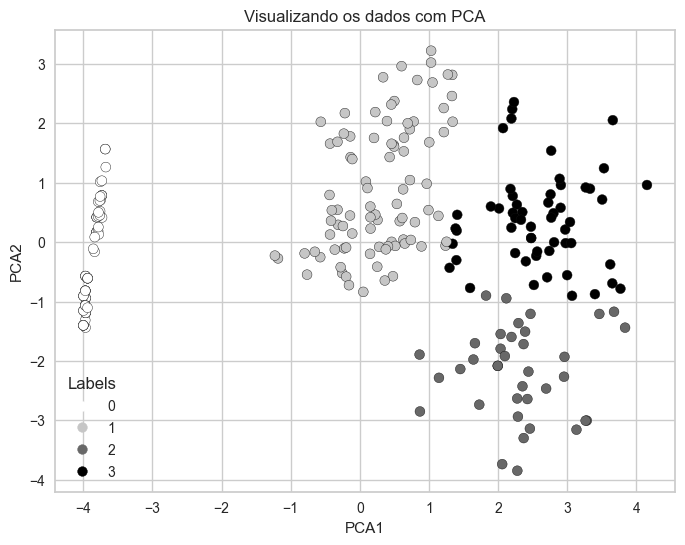

In [1714]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_3['PCA1'], df_3['PCA2'], c=labels, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [1715]:
cluster_0_3 = dados_3.loc[dados_3['Cluster'] == 0]
cluster_1_3 = dados_3.loc[dados_3['Cluster'] == 1]
cluster_2_3 = dados_3.loc[dados_3['Cluster'] == 2]
cluster_3_3 = dados_3.loc[dados_3['Cluster'] == 3]

## Cluster 0

In [1716]:
for i in cluster_0_3:
    print(cluster_0_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      36
Entre 18 e 24 anos     8
Entre 25 e 35 anos     7
Entre 36 e 45 anos     7
Entre 46 e 59 anos     6
60+ anos               2
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     37
Masculino    29
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental                22
Ensino superior concluído                  18
Cursando ensino médio                      14
Cursando ensino superior                    8
Ensino superior incompleto/não iniciado     4
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    28
Classe B: entre R$ 7,1 mil e R$ 22 mil     23
Classe A: superior a R$ 22 mil              8
Classes D/E: até R$ 2,9 mil                 7
Name: count, dtype: int64
Há quanto tempo você se interessa por art

## Cluster 1

In [1717]:
for i in cluster_1_3:
    print(cluster_1_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      50
Entre 18 e 24 anos    10
Entre 46 e 59 anos     9
Entre 25 e 35 anos     8
60+ anos               7
Entre 36 e 45 anos     5
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     61
Masculino    27
Outro         1
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio                      37
Ensino superior concluído                  26
Cursando ensino fundamental                17
Ensino superior incompleto/não iniciado     5
Cursando ensino superior                    2
Ensino médio incompleto                     1
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    36
Classe B: entre R$ 7,1 mil e R$ 22 mil     33
Classes D/E: até R$ 2,9 mil                11
Class

## Cluster 2

In [1718]:
for i in cluster_2_3:
    print(cluster_2_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      35
Entre 25 e 35 anos     1
Entre 46 e 59 anos     1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     21
Masculino    11
Outro         5
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental      19
Cursando ensino médio            13
Ensino fundamental incompleto     3
Cursando ensino superior          2
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    17
Classe B: entre R$ 7,1 mil e R$ 22 mil     11
Classes D/E: até R$ 2,9 mil                 8
Classe A: superior a R$ 22 mil              1
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       11
De 2 a 4 anos             8
De 5 a 9 anos             7
Menos de 2 anos           6
Estou iniciando agora     5
Na

## Cluster 3

In [1719]:
for i in cluster_3_3:
    print(cluster_3_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    19
Entre 46 e 59 anos    11
Entre 36 e 45 anos     9
Menos de 18 anos       7
60+ anos               5
Entre 18 e 24 anos     5
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     37
Masculino    19
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  41
Cursando ensino médio                       7
Ensino superior incompleto/não iniciado     4
Cursando ensino fundamental                 2
Cursando ensino superior                    2
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    23
Classe B: entre R$ 7,1 mil e R$ 22 mil     20
Classe A: superior a R$ 22 mil             10
Classes D/E: até R$ 2,9 mil                 3
Name: count, dtype: int64
Há quanto tempo você se interessa por art